<a href="https://colab.research.google.com/github/Rahul-yadavgithub/Bank-Marketing/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib seaborn --quiet

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os

In [5]:
os.listdir('bank-marketing')

['bank-additional-names.txt', 'bank-additional-full.csv']

In [6]:
data_dir = './bank-marketing'

In [7]:
train_csv = data_dir + '/bank-additional-full.csv'

In [8]:
bank = pd.read_csv(train_csv, sep = ';')

In [35]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
y

,['y']_yes
0,False
1,False
2,False
3,False
4,False
...,...
41183,True
41184,False
41185,False
41186,True


In [11]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
bank_client = bank.iloc[: , 0:7]
bank_client

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [13]:
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [14]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [15]:
print('Eductation:\n', bank_client['education'].unique())

Eductation:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [16]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [17]:
#Trying to find some strange values or null values
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


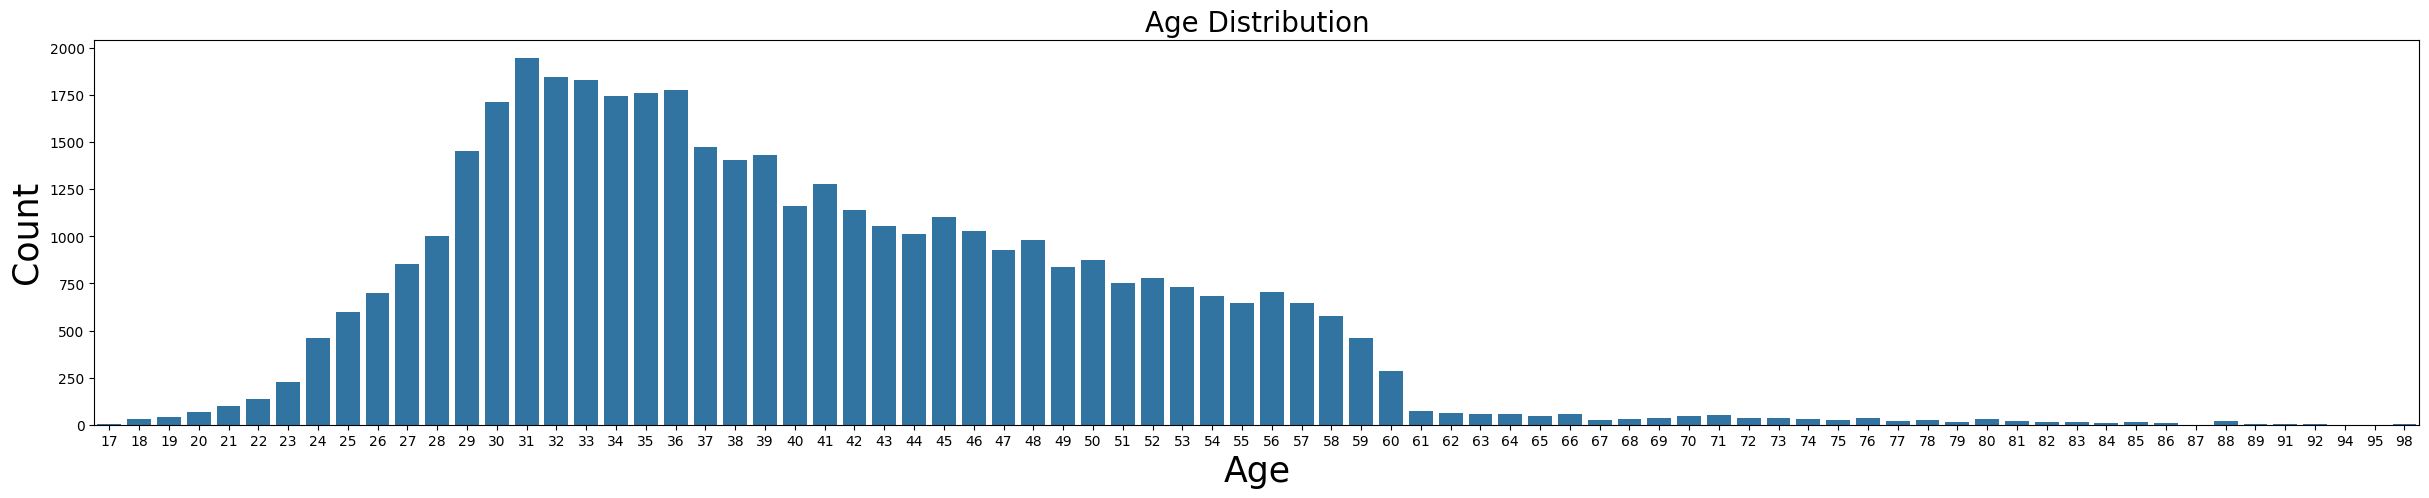

In [18]:
plt.figure(figsize =(30,5), facecolor = 'white')
sns.countplot(x = 'age', data= bank_client)
plt.title('Age Distribution', fontsize = 20)
plt.xlabel('Age', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

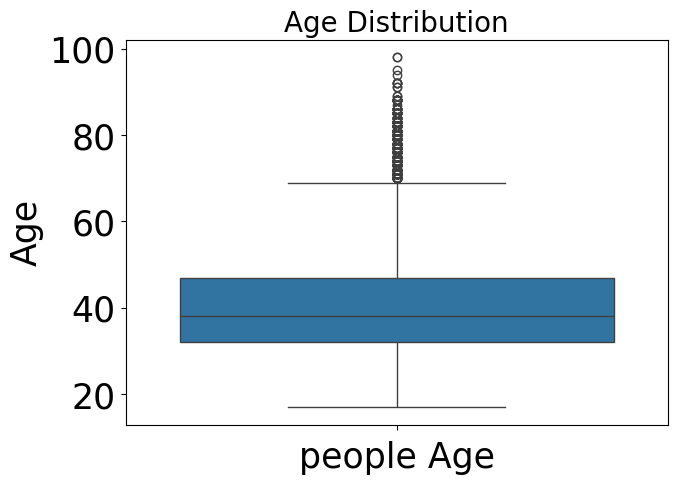

In [19]:
plt.figure(figsize = (7,5), facecolor = 'white')
sns.boxplot(y = 'age', data = bank_client)
plt.title('Age Distribution', fontsize = 20)
plt.xlabel('people Age', fontsize = 25)
plt.ylabel('Age', fontsize = 25)
plt.tick_params(labelsize = 25)
plt.show()

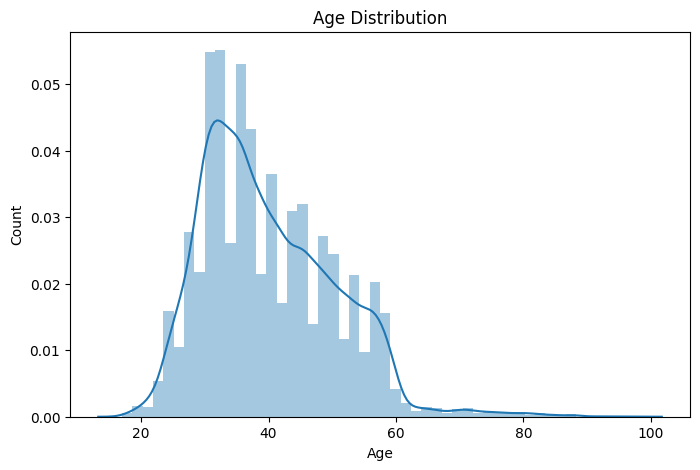

In [20]:
plt.figure(figsize = (8,5), facecolor = 'white')
sns.distplot(bank_client['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tick_params(labelsize = 10)
plt.show()


In [21]:
# Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print('Ages above: ', bank_client['age'].quantile(q = 0.75) +
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [22]:
print('Number of Outliers :', bank_client[bank_client['age']> 69.5]['age'].count())

# Number of total client are

print('Total Client :', len(bank_client))

print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Number of Outliers : 469
Total Client : 41188
Outliers are: 1.14 %


In [23]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient of variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not. The outliers was calculated, so my thinking is fit the model with and without them

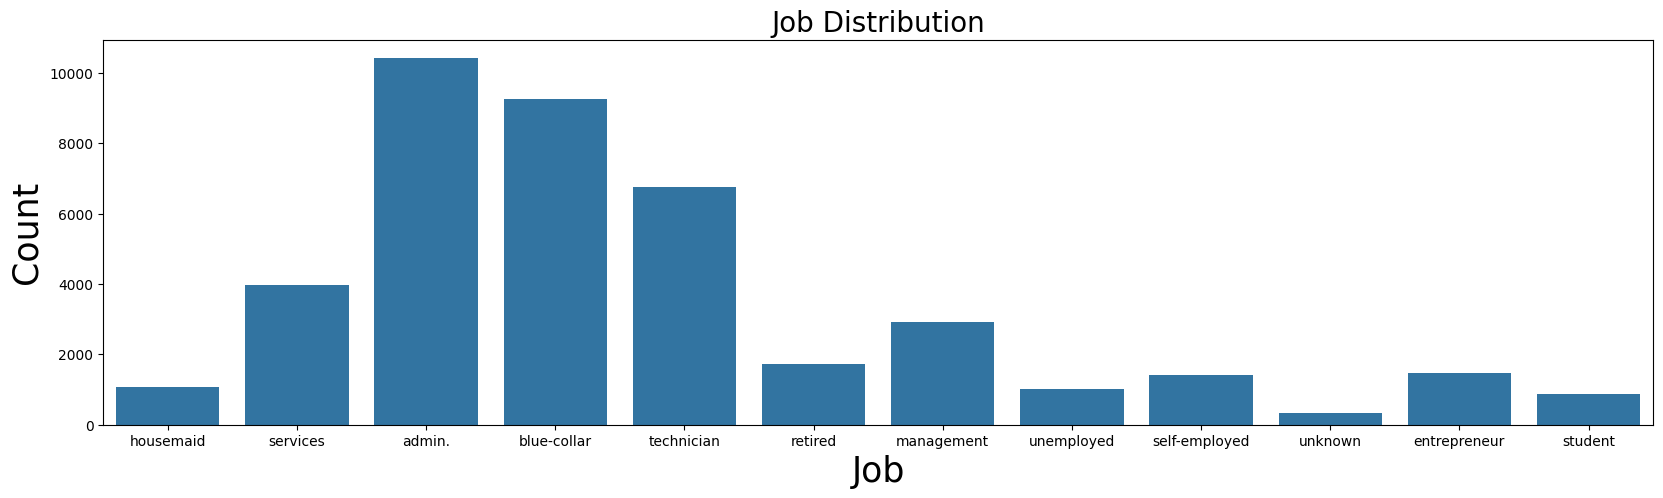

In [24]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation

plt.figure(figsize = (20,5), facecolor = 'white')
sns.countplot(x = 'job', data = bank_client)
plt.title('Job Distribution', fontsize = 20)
plt.xlabel('Job', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

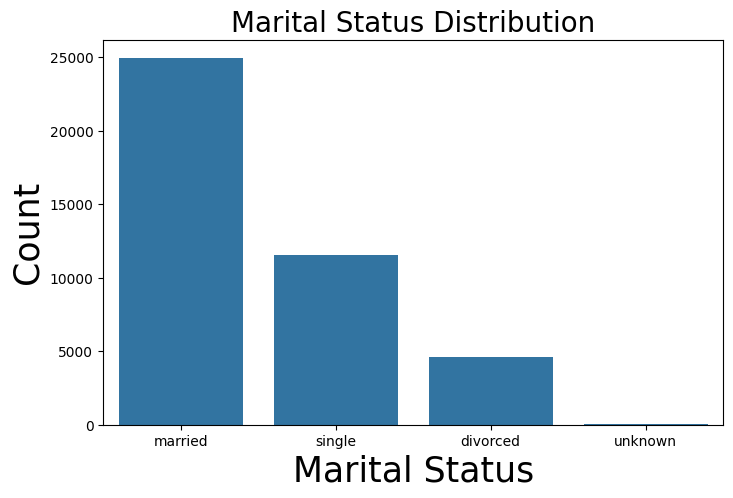

In [25]:
plt.figure(figsize = (8,5), facecolor = 'white')
sns.countplot(x = 'marital', data = bank_client)
plt.title('Marital Status Distribution', fontsize = 20)
plt.xlabel('Marital Status', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

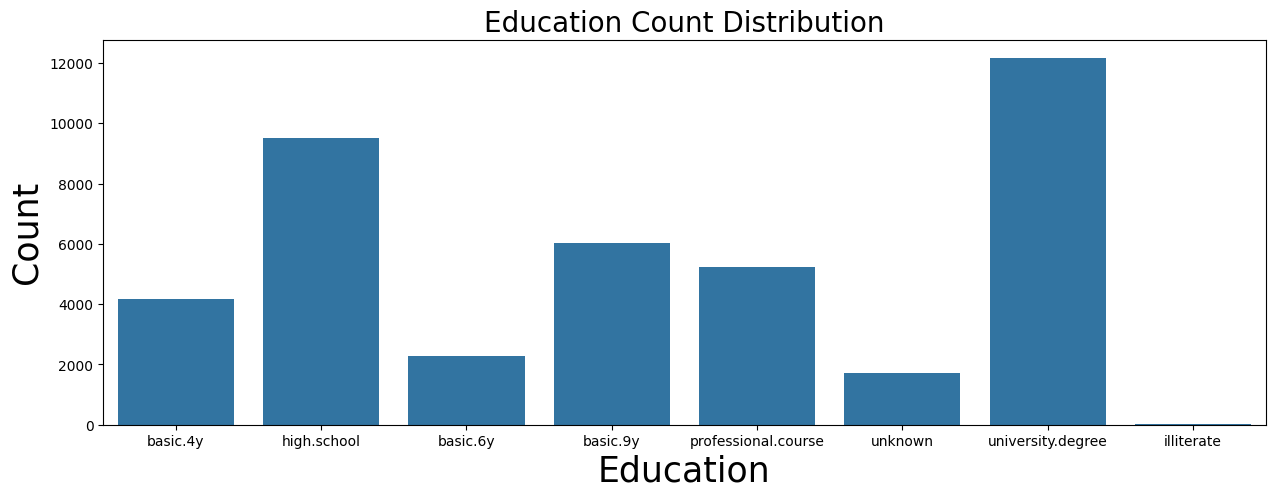

In [26]:
plt.figure(figsize = (15,5), facecolor = 'white')
sns.countplot(x = 'education', data = bank_client)
plt.title('Education Count Distribution', fontsize = 20)
plt.xlabel('Education', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

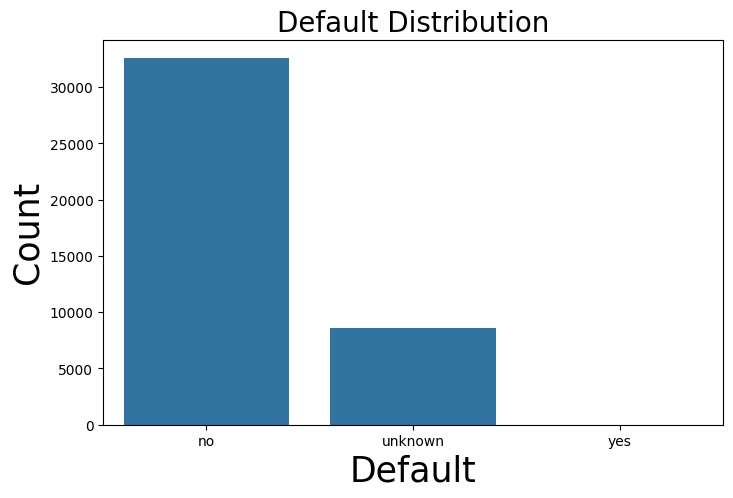

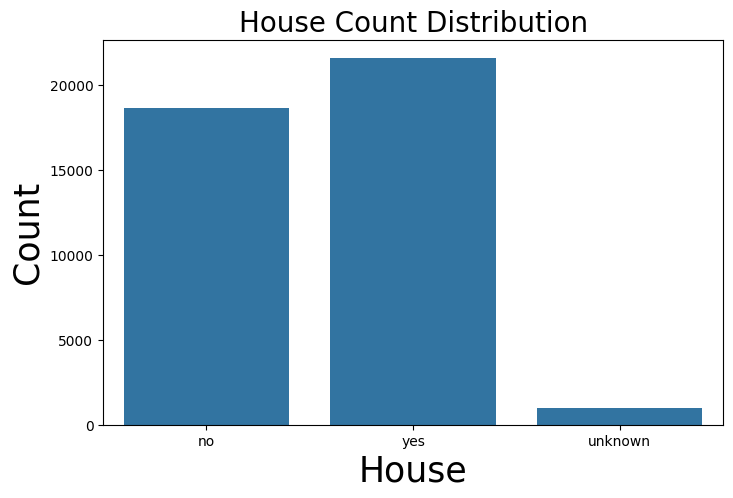

In [27]:
plt.figure(figsize = (8,5), facecolor = 'white')
sns.countplot(x = 'default', data = bank_client)
plt.title('Default Distribution', fontsize = 20)
plt.xlabel('Default', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

plt.figure(figsize = (8,5), facecolor = 'white')
sns.countplot(x = 'housing', data = bank_client)
plt.title('House Count Distribution', fontsize = 20)
plt.xlabel('House', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

In [28]:
print('Housing:\n housing loan is no count:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 housing loan is no count: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576


In [29]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [31]:
bank_client['job'] = encoder.fit_transform(bank_client['job'])
bank_client['marital'] = encoder.fit_transform(bank_client['marital'])
bank_client['education'] = encoder.fit_transform(bank_client['education'])
bank_client['default'] = encoder.fit_transform(bank_client['default'])
bank_client['housing'] = encoder.fit_transform(bank_client['housing'])
bank_client['loan'] = encoder.fit_transform(bank_client['loan'])


In [32]:
def Age(DataFrame):
  DataFrame.loc[DataFrame['age']<=32, 'age'] =1
  DataFrame.loc[(DataFrame['age'] >32) & (DataFrame['age']<=47), 'age'] = 2
  DataFrame.loc[(DataFrame['age'] >47) & (DataFrame['age']<=70), 'age'] = 3
  DataFrame.loc[(DataFrame['age'] >70) & (DataFrame['age']<=97), 'age'] = 4
  return DataFrame

Age(bank_client);

In [34]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [36]:
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [38]:
print('Types of Contact: \n', bank_related['contact'].unique())
print('\n\n Which Month this Campign Works: \n', bank_related['month'].unique())
print('\n\n Which Day of The Week They works: \n', bank_related['day_of_week'].unique())


Types of Contact: 
 ['telephone' 'cellular']


 Which Month this Campign Works: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


 Which Day of The Week They works: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


In [39]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [40]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) +
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [41]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


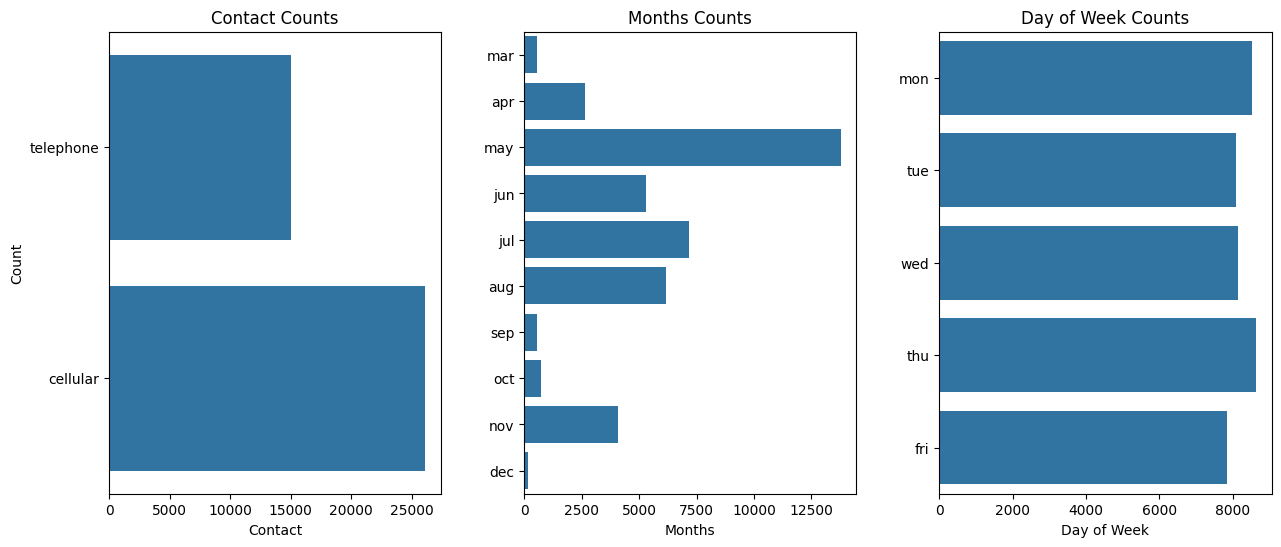

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [45]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact'])
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month'])
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

In [46]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [47]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [49]:
bank_related.head(10)

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3
5,1,6,1,3
6,1,6,1,2
7,1,6,1,3
8,1,6,1,4
9,1,6,1,1


In [50]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [51]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [52]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

| Column Name    | Type                 | Description                                  |
| -------------- | -------------------- | -------------------------------------------- |
| age            | Numeric              | Client's age                                 |
| job            | Categorical          | Type of job                                  |
| marital        | Categorical          | Marital status                               |
| education      | Categorical          | Education level                              |
| default        | Categorical          | Has credit in default                        |
| housing        | Categorical          | Has housing loan                             |
| loan           | Categorical          | Has personal loan                            |
| contact        | Categorical          | Type of communication                        |
| month          | Categorical          | Month of last contact                        |
| day\_of\_week  | Categorical          | Day of last contact                          |
| duration       | Numeric              | Duration of last contact (seconds)           |
| campaign       | Numeric              | Number of contacts in current campaign       |
| pdays          | Numeric              | Days since last contact in previous campaign |
| previous       | Numeric              | Number of contacts before current campaign   |
| poutcome       | Categorical          | Outcome of previous marketing campaign       |
| emp.var.rate   | Numeric              | Employment variation rate (economic)         |
| cons.price.idx | Numeric              | Consumer price index (economic)              |
| cons.conf.idx  | Numeric              | Consumer confidence index (economic)         |
| euribor3m      | Numeric              | 3-month Euribor rate (economic)              |
| nr.employed    | Numeric              | Number of employed people                    |
| y              | Categorical (binary) | Subscribed to term deposit? (target)         |


In [55]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [56]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [57]:
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,7,1,3,1,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,7,1,3,0,2,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,2,0,1,1,0,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,7,1,3,0,0,2,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [59]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
38912,3,5,1,6,0,2,0,0,7,4,5,-3.4,92.649,-30.1,0.716,5017.5,2,3,3,3
9455,2,7,1,5,1,0,0,1,4,0,2,1.4,94.465,-41.8,4.967,5228.1,1,999,0,1
14153,1,4,1,6,0,2,0,0,3,1,5,1.4,93.918,-42.7,4.962,5228.1,3,999,0,1
25021,3,6,1,6,0,2,0,0,7,3,1,-0.1,93.200,-42.0,4.153,5195.8,1,999,0,1
30911,2,5,0,0,0,2,2,0,6,3,3,-1.8,92.893,-46.2,1.344,5099.1,2,999,1,2


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [64]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= bank_final.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = bank_final.columns)

In [66]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,0.969833,0.357677,-0.283791,1.055581,-0.515745,0.940359,-0.452658,-0.756896,1.192908,1.433725,1.971718,-2.206968,-1.593931,2.254747,-1.666490,-2.065673,-0.203339,-5.094116,5.690897,3.983805
1,0.014167,0.914694,-0.283791,0.587974,1.937536,-1.089668,-0.452658,1.321186,-0.101074,-1.431524,-0.456205,0.843990,1.537519,-0.275209,0.780636,0.849374,-0.566627,0.196926,-0.351960,-0.375107
2,-0.941498,0.079169,-0.283791,1.055581,-0.515745,0.940359,-0.452658,-0.756896,-0.532401,-0.715212,1.971718,0.843990,0.594291,-0.469821,0.777758,0.849374,0.159948,0.196926,-0.351960,-0.375107
3,0.969833,0.636186,-0.283791,1.055581,-0.515745,0.940359,-0.452658,-0.756896,1.192908,0.717413,-1.265512,-0.109434,-0.643805,-0.318456,0.312050,0.402289,-0.566627,0.196926,-0.351960,-0.375107
4,0.014167,0.357677,-1.923493,-1.750058,-0.515745,0.940359,2.310159,-0.756896,0.761581,0.717413,0.353103,-1.189982,-1.173186,-1.226645,-1.304977,-0.936196,-0.203339,0.196926,1.662326,1.804349


In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)

LogisticRegression()

In [70]:
Logpreds = model.predict(X_test)

In [71]:
Logpreds

array([False, False, False, ..., False, False, False])

In [72]:
print(confusion_matrix(y_test, Logpreds))

[[6909  164]
 [ 598  329]]


In [73]:
print(round(accuracy_score(y_test, Logpreds),2))

0.9


In [76]:
LOGCV = (cross_val_score(model, X_train, y_train, cv=k_fold, n_jobs=-1, scoring = 'accuracy').mean())
LOGCV

np.float64(0.9098167963109363)

Support Vector Machine (SVM)

Find the best decision boundary (called the hyperplane) that separates different classes (like "yes" vs "no").

It tries to maximize the margin between the nearest points of each class (called support vectors).

Support Vector Classifier(SVC)

In [80]:
from sklearn.tree import DecisionTreeClassifier
Dmodel = DecisionTreeClassifier(random_state = 45)

In [81]:
Dmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=45)

In [84]:
Dpreds = pd.DataFrame(Dmodel.predict(X_test))

In [85]:
Dpreds

,0
0,False
1,False
2,False
3,False
4,False
...,...
7995,False
7996,False
7997,False
7998,False


In [86]:
print(confusion_matrix(y_test, Dpreds))
print(accuracy_score(y_test, Dpreds))

[[6613  460]
 [ 474  453]]
0.88325


In [88]:
Dcv = (cross_val_score(Dmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [89]:
Dcv

np.float64(0.8828187880580893)

In [91]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators = 400)

In [92]:
RFmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [95]:
RFpreds = RFmodel.predict(X_test)

In [96]:
print(confusion_matrix(y_test, RFpreds))
print(accuracy_score(y_test, RFpreds))

[[6789  284]
 [ 490  437]]
0.90325


In [97]:
from xgboost import XGBClassifier
XGBmodel = XGBClassifier()


In [98]:
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [99]:
XGBpreds = XGBmodel.predict(X_test)

In [100]:
print(confusion_matrix(y_test, XGBpreds))
print(accuracy_score(y_test, XGBpreds))

[[6805  268]
 [ 458  469]]
0.90925


In [101]:
from xgboost import XGBRegressor

XGRmodel = XGBRegressor(n_jobs = -1, n_estimator = 1000, random_state = 42, learning_rate = 0.2, max_depth = 10, subsample = 0.9, colsample_bytree = 0.7)

In [103]:
XGRmodel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1000,
             n_estimators=None, n_jobs=-1, ...)

In [104]:
XGRpreds = XGRmodel.predict(X_test)

In [106]:
XGRpreds

array([-0.00719853,  0.00073388, -0.0049301 , ..., -0.06001872,
        0.01492895,  0.13444929], dtype=float32)

In [109]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming XGRpreds are your predictions and y_test are the actual values
# You might need to adjust how you access y_test based on its format
rmse = np.sqrt(mean_squared_error(y_test, XGRpreds))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.2668478111470015


In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6827  246]
 [ 456  471]]
91.0
